# Predict whether a mammogram mass is benign or malignant

We are using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:

   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it from our dataset. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. If we can build a better way to interpret them through supervised machine learning, it could improve a lot of lives.


## Task at hand

We will try to apply several different supervised machine learning techniques to this data set, and see which one yields the highest accuracy.

## Prerequisites

The data may needs to be cleaned; rows may contain missing data, and there may be erroneous data identifiable as outliers as well.

## 1. Preparing the data

Importing the mammographic_masses.data.txt file into a Pandas dataframe.

In [2]:
import pandas as pd
r_cols = ['BI_RADS', 'age', 'shape', 'margin', 'density', 'severity']
data = pd.read_csv('/home/chiranjeet/Documents/DataScience/DataScience-Python3/mammographic_masses.data.txt', sep=',', names=r_cols, usecols=range(6), na_values='?', encoding="ISO-8859-1")

We use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names (BI_RADS, age, shape, margin, density, and severity):

In [3]:
data.head()

,BI_RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


We check whether the data needs cleaning.

In [4]:
data.describe()

,BI_RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


We first check the missing values in the dataset before dropping every row that has missing data.

In [7]:
data.loc[(data['age'].isnull()) | (data['shape'].isnull()) | (data['margin'].isnull()) | (data['density'].isnull())]

,BI_RADS,age,shape,margin,density,severity
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
9,5.0,60.0,NaN,5.0,1.0,1
12,4.0,64.0,1.0,NaN,3.0,0
19,4.0,40.0,1.0,NaN,NaN,0
20,NaN,66.0,NaN,NaN,1.0,1
22,4.0,43.0,1.0,NaN,NaN,0


The missing data seems randomly distributed, so we drop rows with missing data and checked if there is any overall change.

In [9]:
dataFrame = data.dropna()
dataFrame.describe()

,BI_RADS,age,shape,margin,density,severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


Next we convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. We create an array that extracts only the feature data we want to work with (age, shape, margin, and density) and another array that contains the classes (severity). We also need an array of the feature name labels.

In [13]:
features = list(dataFrame.columns[1:5])

X = dataFrame[features]
Y = dataFrame["severity"]

Some models require the input data to be normalized, so we will normalize the attribute

In [17]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaled_X = scaler.fit_transform(X)

## Splitting data into train/test

We set aside 75% of data for training, and 25% for testing.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.25, random_state=1)

## Decision Trees

We now create a DecisionTreeClassifier and fit it to our training data.

In [22]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

Display the resulting decision tree.

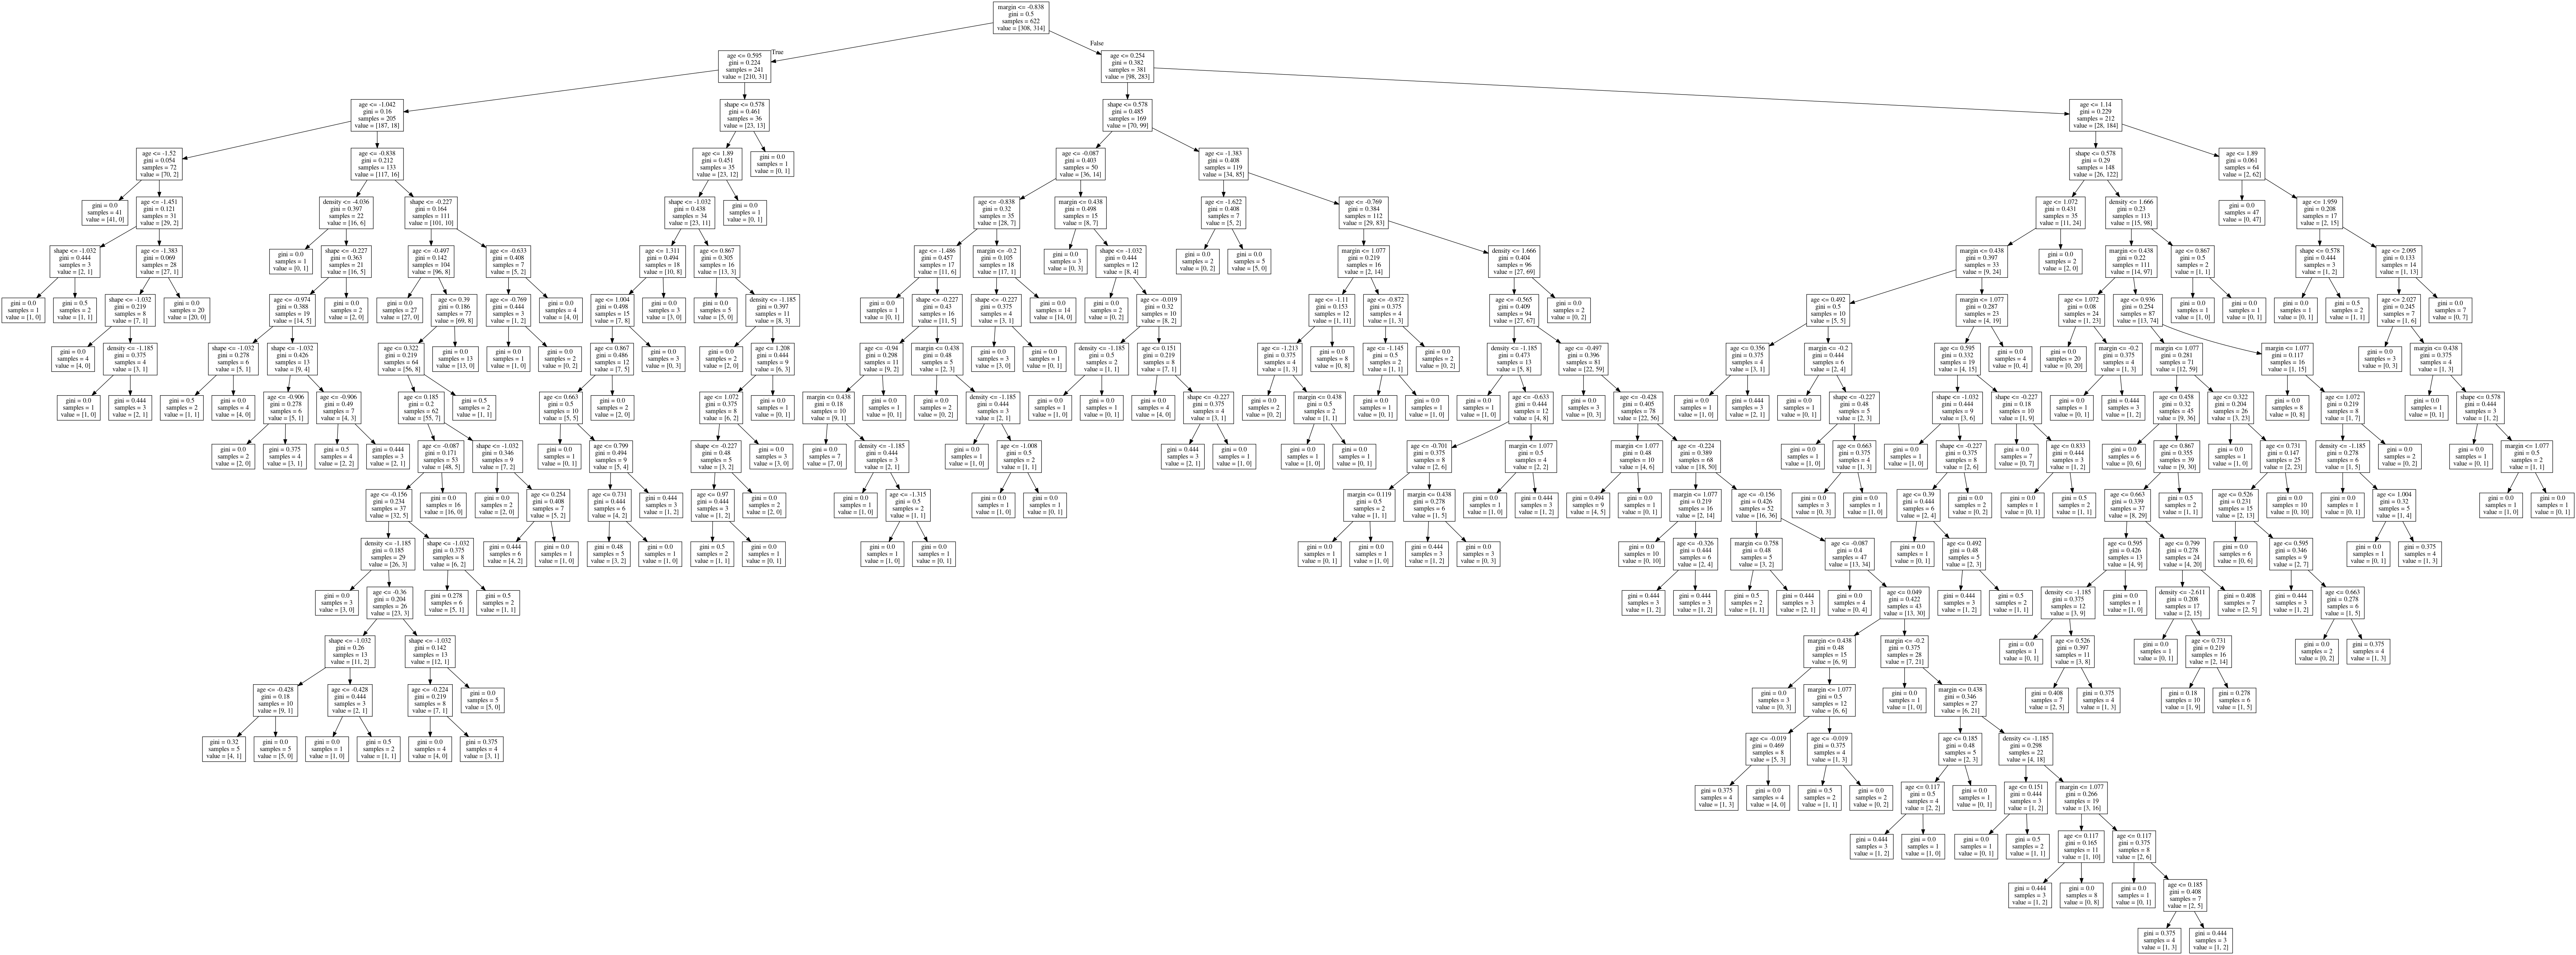

In [23]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(classifier, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

Measuring the accuracy of the resulting decision tree model using your test data.

In [24]:
classifier.score(X_test, y_test) 

0.7403846153846154

## K-Fold cross validation

Now instead of a single train/test split, use K-Fold cross validation to get a better measure of your model's accuracy (K=10). Hint: use model_selection.cross_val_score

In [25]:
from sklearn.model_selection import cross_val_score

# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(classifier, scaled_X, Y, cv=10)

We measure the accuracy of the resulting K-Fold cross validation model using your test data.

In [26]:
# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 10 folds:
print(scores.mean())

[0.71428571 0.78571429 0.73809524 0.72289157 0.78313253 0.68674699
 0.72289157 0.76829268 0.75609756 0.68292683]
0.7361074961868379


## RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10)
classifier = classifier.fit(X_train,y_train)

We measure the accuracy of the resulting RandomForestClassifierusing your test data.

In [28]:
classifier.score(X_test, y_test)

0.7596153846153846

## SVM

Next try using svm.SVC with a linear kernel. How does it compare to the decision tree?

In [30]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X_train,y_train)

Measure the accuracy of the resulting SVM using your test data.

In [31]:
svc.score(X_test, y_test)

0.7692307692307693

## KNN

We start with a K = 10. K is a hyperparameter which may need to be tuned for best results on this data set.

In [35]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)

Measure the accuracy of the resulting KNN Classifier using your test data.

In [36]:
neigh.score(X_test, y_test)

0.7740384615384616

#### Using K-Fold Cross Validation

In [62]:
#classifier = KNeighborsClassifier(n_neighbors=10)
cross_validation__scores = cross_val_score(neigh, scaled_X, Y, cv=10)
cross_validation__scores.mean()

0.7927235072694961

Choosing K is tricky, so we can't discard KNN until we've tried different values of K.

Below is a program which tries KNN with K values ranging from 1 to 50 and to see if K makes a substantial difference. We make a note of the best score we could get from the KNN.

In [50]:
max_score = -1
K = -1
for number in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors = number).fit(X_train,y_train)
    score = neigh.score(X_test, y_test)
    if score > max_score:
        K = number
        max_score = score
print(max_score)
print(K)

0.7836538461538461
7


#### Using K-Fold Cross Validation

In [63]:
max_score = -1
K = -1
for number in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors = number)
    cross_validation__scores = cross_val_score(neigh, scaled_X, Y, cv=10)
    score = cross_validation__scores.mean()
    if score > max_score:
        K = number
        max_score = score
print(max_score)
print(K)

0.7940595133145824
7


## Naive Bayes

Now we try naive_bayes.MultinomialNB. MultinomialNB requires features to be in range, so we need to use MinMaxScaler.

In [64]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(scaled_X)

classifier = MultinomialNB()
cross_validation__scores = cross_val_score(classifier, X_train_minmax,Y, cv=10)

cross_validation__scores.mean()

0.7844055665169388

## Revisiting SVM

svm.SVC may perform differently with different kernels. The choice of kernel is an example of a "hyperparamter." Try the rbf, sigmoid, and poly kernels and see what the best-performing kernel is. Do we have a new winner?

#### SVM using rbf kernel

In [55]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='rbf', C=C).fit(X_train,y_train)

Measure the accuracy of the resulting SVM using your test data.

In [56]:
svc.score(X_test, y_test)

0.7788461538461539

#### SVM using sigmoid kernel

In [57]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='sigmoid', C=C).fit(X_train,y_train)

Measure the accuracy of the resulting SVM using your test data.

In [58]:
svc.score(X_test, y_test)

0.7019230769230769

#### SVM using poly kernel

In [59]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='poly', C=C).fit(X_train,y_train)

Measure the accuracy of the resulting SVM using your test data.

In [61]:
svc.score(X_test, y_test)

0.75

## Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression().fit(X_train,y_train)

Measure the accuracy of the resulting LogisticRegression Classifier using your test data.

In [105]:
classifier.score(X_test, y_test)

0.7836538461538461

#### Using K-Fold Cross Validation

In [65]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
cross_validation_scores = cross_val_score(classifier, scaled_X, Y, cv=10)
cross_validation_scores.mean()

0.8073583532737221